In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = (12,8)
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay



In [ ]:

initial_dataset = pd.read_csv('/content/drive/MyDrive/stock.csv')
initial_dataset.head(10)

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.006903,-0.460000,-2.818628,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.740293,-1.300001,-7.394773,0
7,2022-01-12,16.389999,16.580000,15.970000,16.020000,16.020000,136900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.181191,-1.110001,-6.479863,0
8,2022-01-13,16.000000,16.170000,15.680000,15.810000,15.810000,69100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.596204,-1.400001,-8.134808,0
9,2022-01-14,15.700000,15.750000,15.360000,15.590000,15.590000,92900,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.801553,-1.180000,-7.036376,0


In [ ]:

initial_dataset.info()
print("---------------------")
"Dataset Shape:" ,initial_dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB
---------------------


('Dataset Shape:', (7781, 1285))

In [ ]:

initial_dataset.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
...,...
stochastic-kd-15,587
volumenrelativo,215
diff,155
INCREMENTO,155


<Axes: >

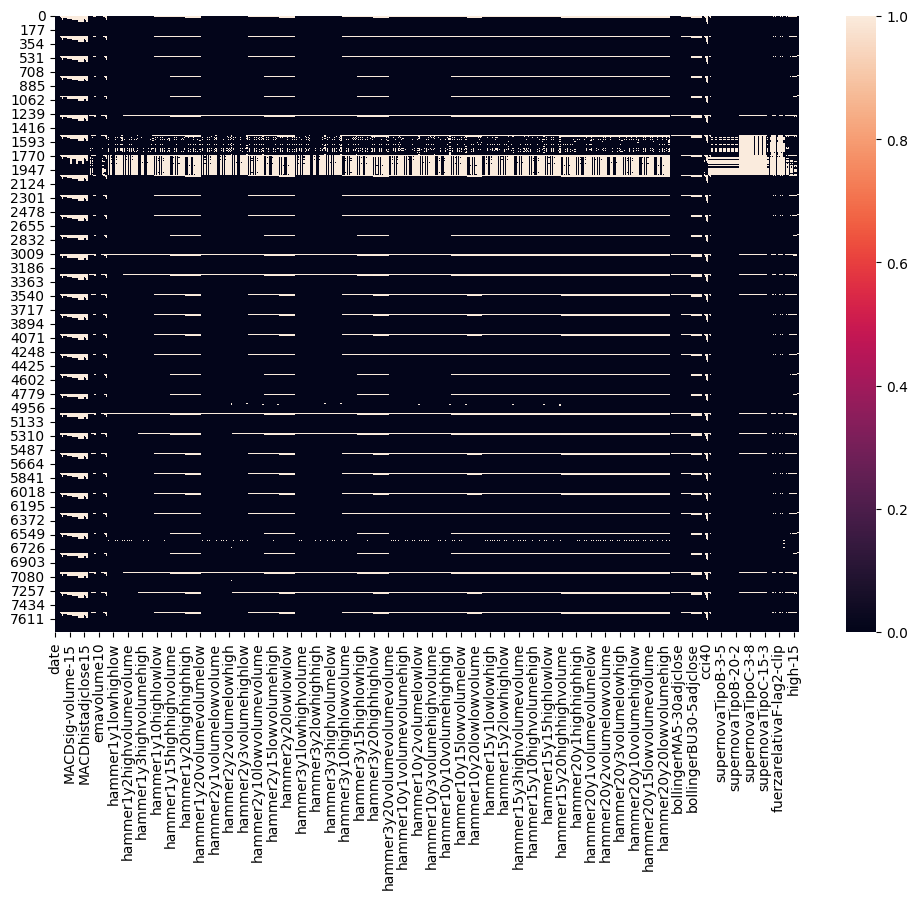

In [ ]:

plt.figure(figsize=(12,8))
sns.heatmap(initial_dataset.isnull())


In [ ]:
initial_dataset.describe()

,open,high,low,close,adjclose,volume,RSIadjclose15,RSIvolume15,RSIadjclose25,RSIvolume25,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
count,7781.000000,7781.000000,7781.000000,7781.000000,7781.000000,7.781000e+03,7316.000000,7316.000000,7006.000000,7006.000000,...,7781.000000,7781.000000,7781.000000,7781.000000,7194.000000,7194.000000,7566.000000,7626.000000,7626.000000,7781.000000
mean,34.990220,35.655999,34.301243,34.964414,34.483147,7.586022e+05,46.817434,49.814790,46.966016,49.898659,...,36.394056,17.428263,24.837735,17.428263,18.704812,0.298413,inf,-0.259186,-2.674224,0.183010
std,99.841502,101.451058,98.073945,99.790823,98.603879,3.934491e+06,11.672838,5.002664,8.760961,3.420371,...,104.499016,73.302214,74.516870,73.302214,74.210933,14.661948,NaN,7.334250,268.268134,0.386699
min,0.410000,0.435000,0.405000,0.408000,0.408000,0.000000e+00,6.837461,35.303213,17.693637,39.520876,...,0.510000,-668.212635,-626.263336,-668.212635,-626.263336,-211.219037,0.000000,-90.538818,-23399.465955,0.000000
25%,4.050000,4.130000,3.980000,4.030000,3.960000,1.080000e+04,38.946316,47.182234,40.954487,48.266978,...,4.945000,2.545452,9.624632,2.545452,8.336837,-6.585432,0.637237,-0.417873,-4.494383,0.000000
50%,10.080000,10.110000,10.005000,10.080000,10.061000,8.406000e+04,46.259711,48.356834,46.459477,48.961162,...,10.260000,24.843423,33.228035,24.843423,28.478797,0.000000,1.000000,-0.025000,-0.304004,0.000000
75%,24.350000,24.500000,24.080000,24.250000,22.466007,6.724000e+05,54.061089,50.902284,52.289893,50.527067,...,24.620001,57.046978,67.069367,57.046978,58.664021,6.726947,1.655385,0.240000,2.812552,0.000000
max,795.739990,799.359985,784.960022,797.489990,783.376221,1.615550e+08,96.365095,99.622735,91.023108,97.782293,...,799.359985,100.000000,100.000000,100.000000,100.000000,198.156313,inf,120.256775,425.000000,1.000000


In [ ]:
data_new = initial_dataset[['date','open', 'high', 'low', 'close']]
data_new

,date,open,high,low,close
0,2022-01-03,17.799999,18.219000,17.500000,17.760000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000
2,2022-01-05,17.580000,17.799999,16.910000,16.950001
3,2022-01-06,16.650000,16.879999,16.139999,16.170000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000
...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7781 non-null   object 
 1   open    7781 non-null   float64
 2   high    7781 non-null   float64
 3   low     7781 non-null   float64
 4   close   7781 non-null   float64
dtypes: float64(4), object(1)
memory usage: 304.1+ KB


In [ ]:
data_new.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0


In [ ]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

,date,open,high,low,close,tomorrow
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000
...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001


In [ ]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

,date,open,high,low,close,tomorrow,target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.660000,False
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,16.950001,False
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.170000,False
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,15.710000,False
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.860000,True
...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,23.350000,True
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,23.350000,False
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,23.610001,True
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.610001,False


target
False    4482
True     3299
Name: count, dtype: int64


<Axes: xlabel='target'>

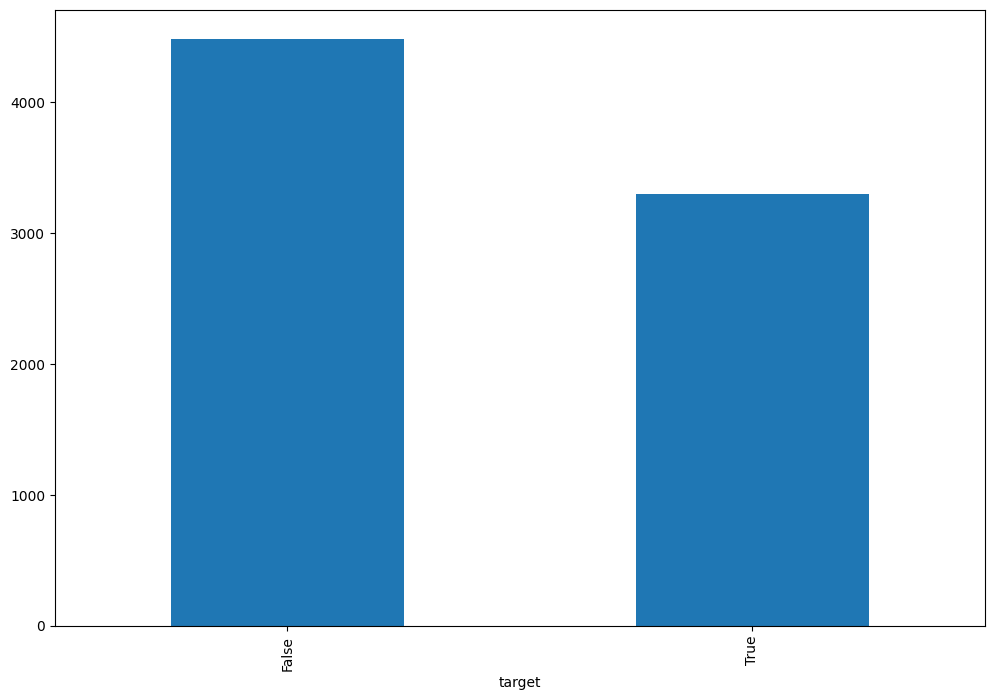

In [ ]:
print(data_new["target"].value_counts())
data_new.groupby('target').size().plot(kind='bar', label="Type")


In [ ]:
notpotable  = data_new[data_new['target']==False]
potable = data_new[data_new['target']==True]


from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 4482)

from sklearn.utils import shuffle
data_new = pd.concat([notpotable, df_minority_upsampled])
data_new = shuffle(initial_dataset)
data_new.shape
data_new.target.value_counts()

,count
target,
True,4482
False,4482


target
True     4482
False    4482
Name: count, dtype: int64


<Axes: xlabel='target'>

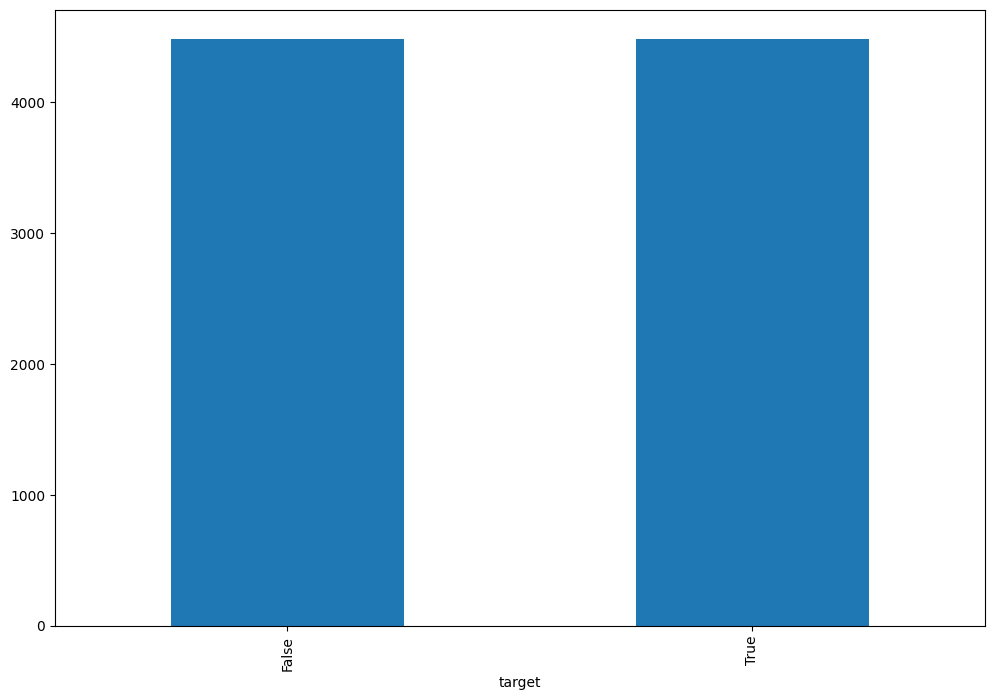

In [ ]:
print(data_new["target"].value_counts())

initial_dataset.groupby('target').size().plot(kind='bar',
                                       y = "target",
                                       label = "Type",)

In [ ]:

from sklearn.model_selection import train_test_split
x = data_new.drop(['target'], axis = 1)
y = data_new[['target']]

In [ ]:
x.head()



,date,open,high,low,close,tomorrow
213,2022-11-07,18.959999,19.07,18.459999,18.50,19.00
3979,2022-11-08,7.460000,7.89,7.000000,7.27,6.63
2037,2022-02-14,11.150000,12.30,11.130000,11.38,11.69
2576,2022-04-07,4.000000,4.01,3.990000,4.00,4.04
3347,2022-05-04,9.590000,9.76,9.170000,9.71,9.28


In [ ]:
z=x.drop(['date'], axis = 1)

In [ ]:
z.head(10)

,open,high,low,close,tomorrow
213,18.959999,19.070,18.459999,18.500,19.00
3979,7.460000,7.890,7.000000,7.270,6.63
2037,11.150000,12.300,11.130000,11.380,11.69
2576,4.000000,4.010,3.990000,4.000,4.04
3347,9.590000,9.760,9.170000,9.710,9.28
288,4.450000,4.700,4.300000,4.390,4.30
4199,5.190000,5.330,5.140000,5.300,5.35
4696,3.810000,3.900,3.660000,3.700,3.67
7766,23.190001,23.340,23.030001,23.260,23.27
3721,0.570000,0.599,0.560000,0.597,0.63


In [ ]:
z.isnull().sum()

,0
open,0
high,0
low,0
close,0
tomorrow,1


In [ ]:
impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(z[['open']])

z['open'] = impute.transform(z[['open']])

impute.fit(z[['high']])

z['high'] = impute.transform(z[['high']])

impute.fit(z[['low']])

z['low'] = impute.transform(z[['low']])

impute.fit(z[['close']])

z['close'] = impute.transform(z[['close']])

impute.fit(z[['tomorrow']])

z['tomorrow'] = impute.transform(z[['tomorrow']])

In [ ]:

#Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(z)
# transform data
z = scaler.transform(z)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(8964, 6) (7171, 5) (1793, 5)


In [ ]:

print("per-feature minimum after scaling:\n {}".format(
    x_train.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    x_train.max(axis=0)))

per-feature minimum after scaling:
 [1.25733854e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1.]


Accuracy: 0.520914668153932
F1: 0.2906688687035508
Precision: 0.6027397260273972
Recall: 0.191512513601741


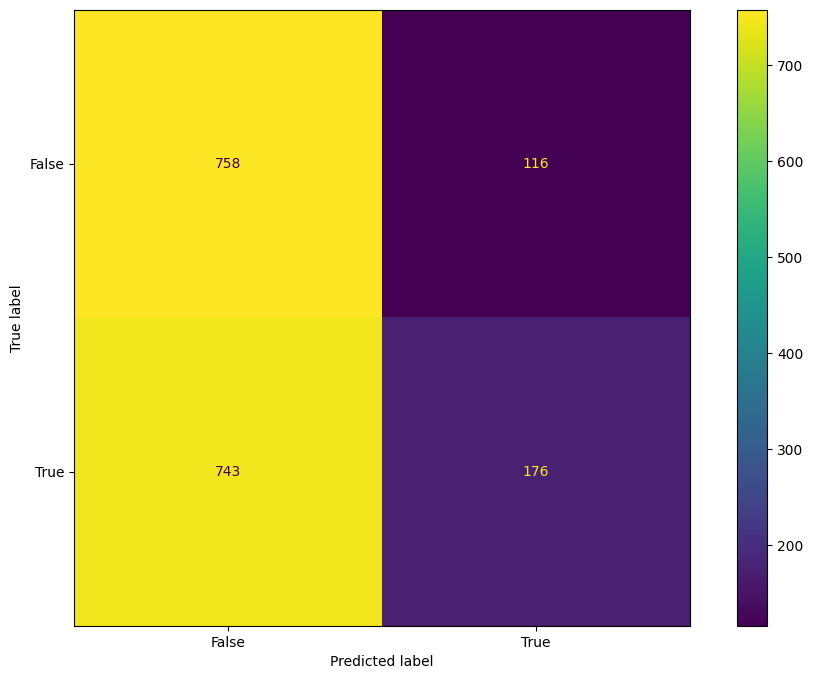

In [ ]:

from sklearn import svm

svm_classifier = svm.SVC()
svm_classifier.fit(x_train, y_train)


y_pred_svm = svm_classifier.predict(x_test)


accuracySVM = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracySVM)
F1_score_svm=f1_score(y_test,y_pred_svm)
print("F1:", F1_score_svm)

precisionSVM = precision_score(y_test, y_pred_svm)
print('Precision:', precisionSVM)


recallSVM = recall_score(y_test, y_pred_svm)
print('Recall:', recallSVM)


cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_classifier.classes_)


disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_classifier.classes_)
disp_svm.plot()
plt.show()


Accuracy: 0.9096486335750139
F1: 0.9131832797427653
Precision: 0.8996832101372756
Recall: 0.9270946681175191


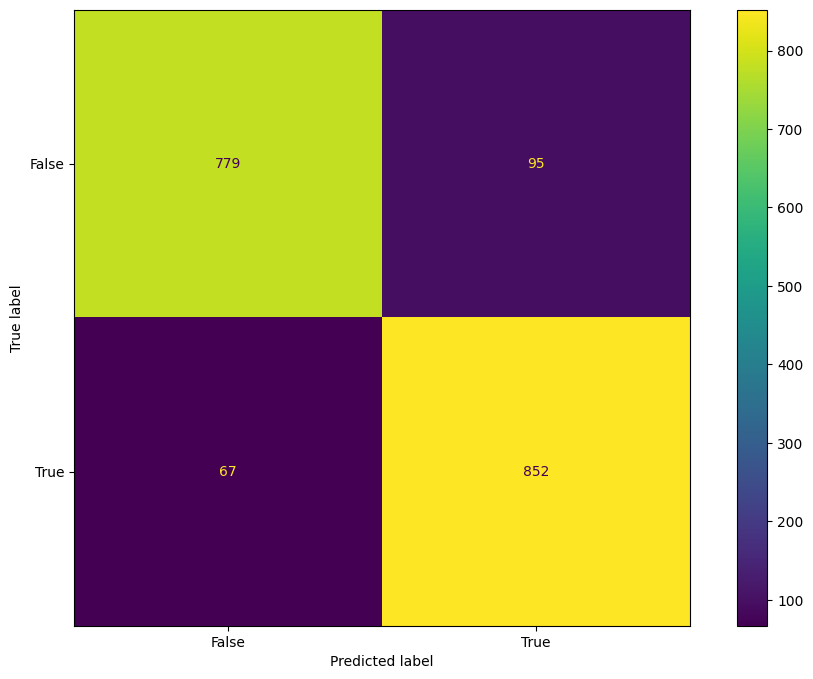

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# create a regressor object
regressorDT = DecisionTreeClassifier()

regressorDT.fit(x_train, y_train)

y_pred_DT = regressorDT.predict(x_test)


accuracyDT = accuracy_score(y_test, y_pred_DT)
print("Accuracy:", accuracyDT)
F1_score_dt=f1_score(y_test,y_pred_DT)
print("F1:", F1_score_dt)
precisionDT = precision_score(y_test, y_pred_DT)
print('Precision:', precisionDT)

recallDT = recall_score(y_test, y_pred_DT)
print('Recall:', recallDT)

cm = confusion_matrix(y_test, y_pred_DT, labels=regressorDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regressorDT.classes_)

disp.plot()
plt.show()